In [1]:
cd Parallel-OMP

/WAVE/users2/unix/wdurbano/csen145/CNN-CPP/Parallel-OMP


In [2]:
cd logs

/WAVE/users2/unix/wdurbano/csen145/CNN-CPP/Parallel-OMP/logs


In [9]:
import re
import pandas as pd

# Read the log file
with open('CNN.74897.cpu02.log', 'r') as file:
    log_data = file.read()

# Define regex patterns for thread count, total training time, and total testing time
thread_pattern = r"Thread count:\s*(\d+)"

# Pattern for total time in training and testing
train_time_pattern = r"\[Train\].*?Total time:\s*([\d.]+)\s*s"
test_time_pattern = r"\[Valid\].*?Total time:\s*([\d.]+)\s*s"

# Extract thread count
thread_count_matches = re.findall(thread_pattern, log_data)

# Extract total times for training and testing
train_time_matches = re.findall(train_time_pattern, log_data)
test_time_matches = re.findall(test_time_pattern, log_data)

# Check if the regex patterns matched any data
print(f"Found {len(train_time_matches)} training total times")
print(f"Found {len(test_time_matches)} testing total times")
print(f"Found {len(thread_count_matches)} thread count entries")

# Ensure that we have the same number of thread counts, training times, and testing times
min_length = min(len(train_time_matches), len(test_time_matches), len(thread_count_matches))

# Create a DataFrame to hold the data
data = {
    "Thread Count": thread_count_matches[:min_length],
    "Train Total Time (s)": train_time_matches[:min_length],
    "Test Total Time (s)": test_time_matches[:min_length]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate types
df["Thread Count"] = df["Thread Count"].astype(int)
df["Train Total Time (s)"] = df["Train Total Time (s)"].astype(float)
df["Test Total Time (s)"] = df["Test Total Time (s)"].astype(float)

# Display the DataFrame
print("\nExtracted DataFrame:")
print(df)

# Save the DataFrame to CSV if needed
df.to_csv('time_data.csv', index=False)


Found 11 training total times
Found 11 testing total times
Found 11 thread count entries

Extracted DataFrame:
    Thread Count  Train Total Time (s)  Test Total Time (s)
0              1                203.69                25.92
1              2                133.47                14.61
2              4                122.28                13.24
3              8                190.48                17.75
4             12                231.64                19.90
5             14                248.27                20.24
6             16                261.46                20.74
7             18                280.49                21.12
8             20                299.11                21.39
9             22                316.34                22.12
10            24                335.64                22.82


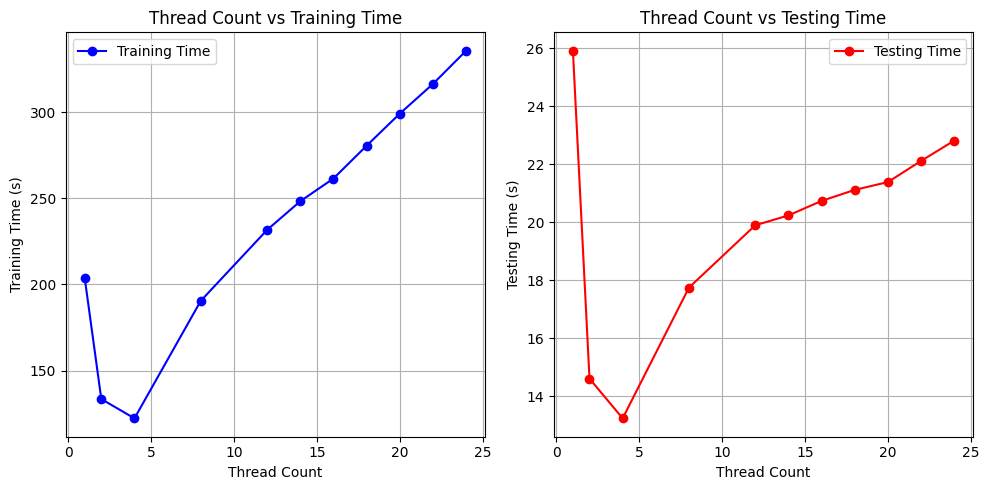

In [10]:
import matplotlib.pyplot as plt

# Plot thread count vs training time
plt.figure(figsize=(10, 5))

# Plot for Training Total Time
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(df["Thread Count"], df["Train Total Time (s)"], marker='o', color='b', label="Training Time")
plt.title("Thread Count vs Training Time")
plt.xlabel("Thread Count")
plt.ylabel("Training Time (s)")
plt.grid(True)
plt.legend()

# Plot for Testing Total Time
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(df["Thread Count"], df["Test Total Time (s)"], marker='o', color='r', label="Testing Time")
plt.title("Thread Count vs Testing Time")
plt.xlabel("Thread Count")
plt.ylabel("Testing Time (s)")
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [5]:
import re
import pandas as pd

# Read the log file
with open('CNN.74931.mem01.log', 'r') as file:
    log_data = file.read()

# Define regex patterns for thread count, total training time, and total testing time
thread_pattern = r"Thread count:\s*(\d+)"

# Pattern for total time in training and testing
train_time_pattern = r"\[Train\].*?Total time:\s*([\d.]+)\s*s"
test_time_pattern = r"\[Valid\].*?Total time:\s*([\d.]+)\s*s"

# Extract thread count
thread_count_matches = re.findall(thread_pattern, log_data)

# Extract total times for training and testing
train_time_matches = re.findall(train_time_pattern, log_data)
test_time_matches = re.findall(test_time_pattern, log_data)

# Check if the regex patterns matched any data
print(f"Found {len(train_time_matches)} training total times")
print(f"Found {len(test_time_matches)} testing total times")
print(f"Found {len(thread_count_matches)} thread count entries")

# Ensure that we have the same number of thread counts, training times, and testing times
min_length = min(len(train_time_matches), len(test_time_matches), len(thread_count_matches))

# Create a DataFrame to hold the data
data = {
    "Thread Count": thread_count_matches[:min_length],
    "Train Total Time (s)": train_time_matches[:min_length],
    "Test Total Time (s)": test_time_matches[:min_length]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate types
df["Thread Count"] = df["Thread Count"].astype(int)
df["Train Total Time (s)"] = df["Train Total Time (s)"].astype(float)
df["Test Total Time (s)"] = df["Test Total Time (s)"].astype(float)

# Display the DataFrame
print("\nExtracted DataFrame:")
print(df)

# Save the DataFrame to CSV if needed
df.to_csv('time_data.csv', index=False)


Found 8 training total times
Found 8 testing total times
Found 9 thread count entries

Extracted DataFrame:
   Thread Count  Train Total Time (s)  Test Total Time (s)
0             1                182.92                21.97
1             2                117.62                13.11
2             4                105.52                12.06
3             8                145.29                14.32
4            12                161.06                15.00
5            14                171.15                14.94
6            16                179.98                14.98
7            18                190.33                15.39


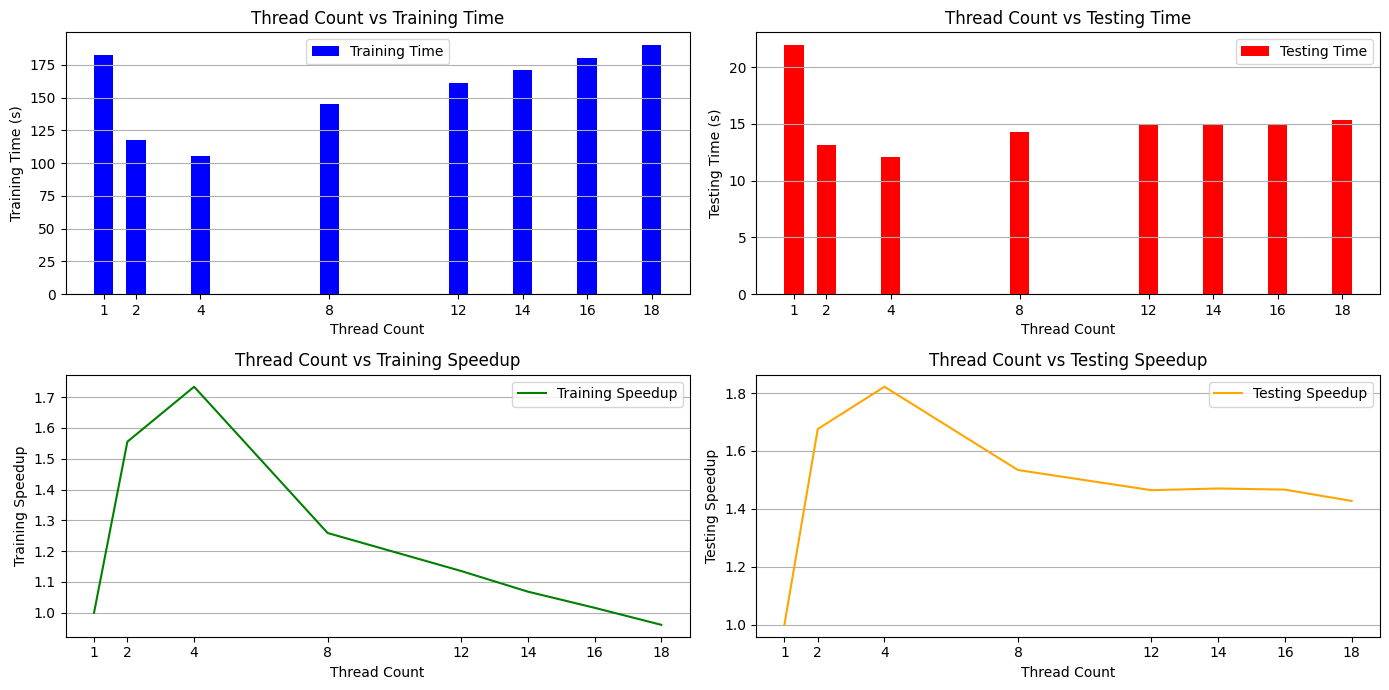

In [17]:
import matplotlib.pyplot as plt

# Get the time for 1 thread
train_time_1_thread = df[df["Thread Count"] == 1]["Train Total Time (s)"].values[0]
test_time_1_thread = df[df["Thread Count"] == 1]["Test Total Time (s)"].values[0]

# Calculate speedup for training and testing
df["Train Speedup"] = train_time_1_thread / df["Train Total Time (s)"]
df["Test Speedup"] = test_time_1_thread / df["Test Total Time (s)"]

# Plot thread count vs training time and speedup as bar graphs
plt.figure(figsize=(14, 7))

# Define the bar width (narrower to avoid spacing out)
bar_width = 0.6

# Plot for Training Total Time
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
plt.bar(df["Thread Count"], df["Train Total Time (s)"], width=bar_width, color='b', label="Training Time")
plt.title("Thread Count vs Training Time")
plt.xlabel("Thread Count")
plt.ylabel("Training Time (s)")
plt.xticks(df["Thread Count"].astype(int))  # Ensure integer x-axis ticks
plt.grid(True, axis='y')
plt.legend()

# Plot for Testing Total Time
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
plt.bar(df["Thread Count"], df["Test Total Time (s)"], width=bar_width, color='r', label="Testing Time")
plt.title("Thread Count vs Testing Time")
plt.xlabel("Thread Count")
plt.ylabel("Testing Time (s)")
plt.xticks(df["Thread Count"].astype(int))  # Ensure integer x-axis ticks
plt.grid(True, axis='y')
plt.legend()

# Plot for Training Speedup
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd plot
plt.plot(df["Thread Count"], df["Train Speedup"], color='g', label="Training Speedup")
plt.title("Thread Count vs Training Speedup")
plt.xlabel("Thread Count")
plt.ylabel("Training Speedup")
plt.xticks(df["Thread Count"].astype(int))  # Ensure integer x-axis ticks
plt.grid(True, axis='y')
plt.legend()

# Plot for Testing Speedup
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
plt.plot(df["Thread Count"], df["Test Speedup"], color='orange', label="Testing Speedup")
plt.title("Thread Count vs Testing Speedup")
plt.xlabel("Thread Count")
plt.ylabel("Testing Speedup")
plt.xticks(df["Thread Count"].astype(int))  # Ensure integer x-axis ticks
plt.grid(True, axis='y')
plt.legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
